# <span style="color:green">Assignment 1</span>
---

This report is written in the course 02806 Social Data Analysis, spring 2017, based on the assignment description found [here](https://github.com/suneman/socialdataanalysis2017/blob/master/assignments/Assignment1.ipynb). 

Description of methods are described briefly and questions are added where needed.

## <span style="color:green">Libraries</span>
**Importing needed packages for entire solution**

In [3]:
import urllib2
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from scipy import stats, linalg
from scipy.interpolate import interp1d
import pandas as pd
from collections import Counter 
from operator import itemgetter
import geoplotlib as gpl
from geoplotlib.utils import BoundingBox
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import pylab as pl
from sklearn import neighbors, datasets

----
## <span style="color:green">Exercise 1A - Anscombe's quartet</span>
**These exercises are made using functions that afterwards are applied on each of the datasets**

To get an understanding of how the work is done, a short description is given here -- the rest is (hopefully) self-explanatory when consulting the code: 
* ``getData`` - Reads in the 4 different data files
* ``getXYMean`` - calculates mean of x and y
* ``calcVariance`` and ``getXYVariance`` - calculates variance (helper function) and outputs variance of x and y
* ``PearsonRCorr`` - calculates the Pearson R correlation
* ``generateDataForPlot`` prints all relevant values pr. dataset
* Last all the plots are generated. This is done with a ``for``-loop to lessen the amount of code.

For each dataset different statistics are printed in order to get an overview of each dataset.

In [4]:
# Getting the data 
# Function to fetch data from given URL output values in lists for x and y
# This will only work on dataset of size 2 x N, 2 columns, N rows
def getData(filename):
    arr = []
    query = ('https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/'+ str(filename)+'.tsv')
    f = urllib2.urlopen(query)

    for line in f.readlines():
        arr.append(re.split('\t|\n',line))
    
    # Making up for the bad values in arr 
    x_val=[]
    y_val=[]

    for ii in range(0,len(arr)):
        x_val.append(arr[ii][0]) 
        y_val.append(arr[ii][1])
    x_val = np.asarray([float(i) for i in x_val])
    y_val = np.asarray([float(i) for i in y_val])
    return x_val, y_val

**Function to calculate mean and format output to 2 decimal places**

In [5]:
# Function to find mean of x and y values 
def getXYMean(x,y):
    return np.mean(x), np.mean(y)    

**Function to calculate variance**

In [6]:
# Calculate variance (without use of built-in functions)
def calcVariance(vec, meanVec):
    variance = 1/(len(vec)-1)*(sum(vec-meanVec)**2)
    return variance

# Calculating variance for x and y values
def getXYVariance(x,y):
    xMean, yMean = getXYMean(x,y)
    x_var = calcVariance(x,xMean)
    y_var = calcVariance(y,yMean)
    return np.var(x), np.var(y)

**Function to calculate Pearson R correlation**
> Using the formula as described on [Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

In [7]:
# Pearson R correlation (calculated without built-in functions)
# This could also have been calculated with numpy: np.corrcoef(x,y)
def PearsonRCorr(x,y):
    x_val
    y_val
    covXY = np.cov(x,y)
    stdX  = np.std(x)
    stdY  = np.std(y)
    PRC = covXY/(stdX*stdY)
    return PRC

**Final function returning all needed parameters for each dataset**

> *This function in turn calls all functions created above to get the needed information for the final plots. For each of the data that we need to calculate, the function outputs descriptions and answers.*

In [8]:
def generateDataForPlot(filename):
    print "--- Calculation based on information from dataset:", filename, "---\n" 
    # Fetching data from file, writing x and y values to separate vectors
    x_val, y_val = getData(filename)
    print "Original x-values:   ", x_val, "\nNo. of observations: ", len(x_val), "\n" 
    print "Original y-values:   ", y_val, "\nNo. of observations: ", len(y_val), "\n"
    
    # mean for x and y values, only 2 decimal places
    x_mean, y_mean = getXYMean(x_val,y_val)
    print "Mean of x-values:    ", "%.2f" % x_mean
    print "Mean of y-values:    ", "%.2f" % y_mean, "\n"
    
    # Variance for x and y values, only 2 decimal places
    x_var, y_var = getXYVariance(x_val,y_val)
    print "Variance of x-values:", "%.2f" % x_var
    print "Variance of y-values:", "%.2f" % y_var, "\n"
    
    # Calculating Pearson R Correlation w. numpy, 3 decimal places
    prc = np.corrcoef(x_val,y_val)
    print "Pearson R Correlation:\n", prc, "\n"
    
    # Linear regression values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_val,y_val)
    print "Slope:               ", slope, "\nIntercept:           ", intercept
    
    return x_val, y_val, x_mean, y_mean, x_var, y_var, prc, slope, intercept 

*The same function to get all calculations without print (made for the plotting)*

In [9]:
def generateDataForPlotNoPrint(filename):
    # Fetching data from file, writing x and y values to separate vectors
    x_val, y_val = getData(filename)
    
    # mean for x and y values, only 2 decimal places
    x_mean, y_mean = getXYMean(x_val,y_val)
    
    # Variance for x and y values, only 2 decimal places
    x_var, y_var = getXYVariance(x_val,y_val)
    
    # Calculating Pearson R Correlation w. numpy, 3 decimal places
    prc = np.corrcoef(x_val,y_val)
    
    # Linear regression values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_val,y_val)
    
    return x_val, y_val, x_mean, y_mean, x_var, y_var, prc, slope, intercept 

### Data1.tsv

*Getting data values, calculating mean and variance and Pearson R*

In [10]:
 x_val, y_val, x_mean, y_mean, x_var, y_var, prc, slope, intercept = generateDataForPlot('data1')

--- Calculation based on information from dataset: data1 ---

Original x-values:    [ 10.   8.  13.   9.  11.  14.   6.   4.  12.   7.   5.] 
No. of observations:  11 

Original y-values:    [  8.04   6.95   7.58   8.81   8.33   9.96   7.24   4.26  10.84   4.82
   5.68] 
No. of observations:  11 

Mean of x-values:     9.00
Mean of y-values:     7.50 

Variance of x-values: 10.00
Variance of y-values: 3.75 

Pearson R Correlation:
[[ 1.          0.81642052]
 [ 0.81642052  1.        ]] 

Slope:                0.500090909091 
Intercept:            3.00009090909


### Data2.tsv

*Getting data values, calculating mean and variance and Pearson R*

In [11]:
 x_val, y_val, x_mean, y_mean, x_var, y_var, prc, slope, intercept = generateDataForPlot('data2')

--- Calculation based on information from dataset: data2 ---

Original x-values:    [ 10.   8.  13.   9.  11.  14.   6.   4.  12.   7.   5.] 
No. of observations:  11 

Original y-values:    [ 9.14  8.14  8.74  8.77  9.26  8.1   6.13  3.1   9.13  7.26  4.74] 
No. of observations:  11 

Mean of x-values:     9.00
Mean of y-values:     7.50 

Variance of x-values: 10.00
Variance of y-values: 3.75 

Pearson R Correlation:
[[ 1.          0.81623651]
 [ 0.81623651  1.        ]] 

Slope:                0.5 
Intercept:            3.00090909091


### Data3.tsv

*Getting data values, calculating mean and variance and Pearson R*

In [12]:
data3 = generateDataForPlot('data3')

--- Calculation based on information from dataset: data3 ---

Original x-values:    [ 10.   8.  13.   9.  11.  14.   6.   4.  12.   7.   5.] 
No. of observations:  11 

Original y-values:    [  7.46   6.77  12.74   7.11   7.81   8.84   6.08   5.39   8.15   6.42
   5.73] 
No. of observations:  11 

Mean of x-values:     9.00
Mean of y-values:     7.50 

Variance of x-values: 10.00
Variance of y-values: 3.75 

Pearson R Correlation:
[[ 1.          0.81628674]
 [ 0.81628674  1.        ]] 

Slope:                0.499727272727 
Intercept:            3.00245454545


### Data4.tsv

*Getting data values, calculating mean and variance and Pearson R*

In [13]:
data4 = generateDataForPlot('data4')

--- Calculation based on information from dataset: data4 ---

Original x-values:    [  8.   8.   8.   8.   8.   8.   8.  19.   8.   8.   8.] 
No. of observations:  11 

Original y-values:    [  6.58   5.76   7.71   8.84   8.47   7.04   5.25  12.5    5.56   7.91
   6.89] 
No. of observations:  11 

Mean of x-values:     9.00
Mean of y-values:     7.50 

Variance of x-values: 10.00
Variance of y-values: 3.75 

Pearson R Correlation:
[[ 1.          0.81652144]
 [ 0.81652144  1.        ]] 

Slope:                0.499909090909 
Intercept:            3.00172727273


### Comment on the data
From the 4 data descriptions above, we can see that the 4 different dataset all have the same number of observation, variance, mean and Pearson R-values with respect to `x` and `y`, respectively. 

### Plotting everything together
Looping over the different datasets and their values to plot the different data accordingly.

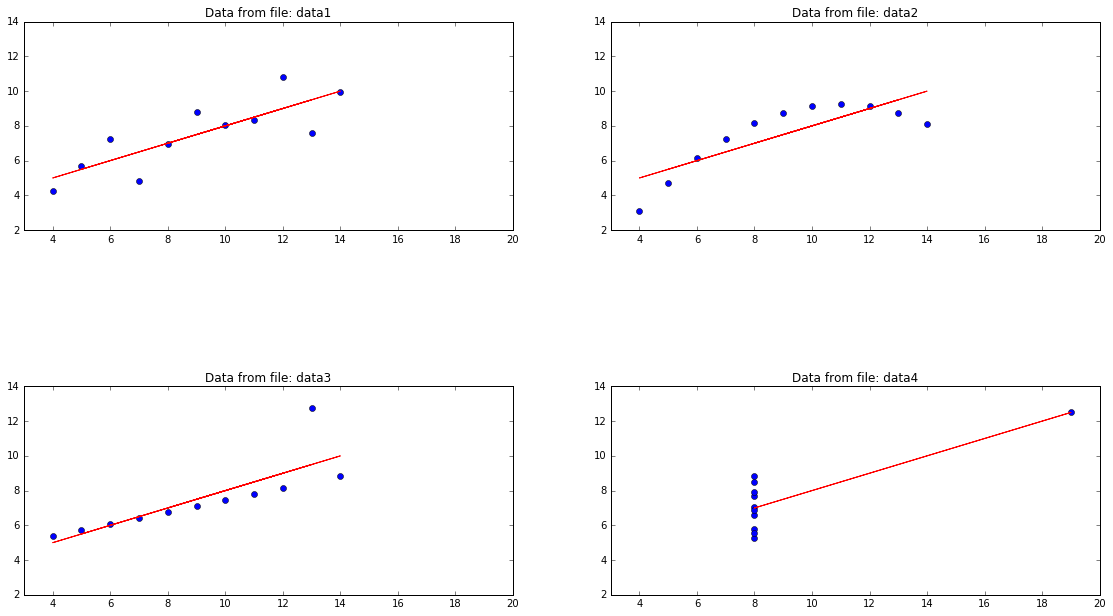

In [14]:
filenames = ['data1','data2','data3','data4']
plotVar = 1 # variable to keep track of subplots

# Loop to generate plots
for filename in filenames:
    # Get needed variables
    x_val, y_val, x_mean, y_mean, x_var, y_var, prc, slope, intercept = generateDataForPlotNoPrint(filename)
    # Generate subplot
    plt.subplot(2, 2, plotVar) # 2 x 2 grid of plots
    plt.plot(x_val, y_val, 'o')
    straightLine = [slope * i + intercept for i in x_val] 
    plt.plot(x_val, straightLine, 'r-')
    
    # For pretty plotting
    plt.ylim(2, 14)
    plt.xlim(3, 20)
    plt.title("Data from file: "+filename)
    plt.subplots_adjust(bottom=.01, left=.01, right=2.5, top=2.0, hspace=.75)

    # Increment plot variable and reset counter
    plotVar += 1
    straightLine = []
plt.show() # Show plot after each subplot has been created

### Your point with this exercise
* To get familiar with plotting and how to use different built-in functions in Python.
* Get a sense of how to work with data

----
## <span style="color:green">Exercise 1B - K Nearest Neighbours</span>
Using crimes: ``PROSTITUTION``, ``DRUG/NARCOTIC`` and ``DRIVING UNDER THE INFLUENCE`` to plot KNN-map with ``geoplotlib``.

In this exercise the ``pandas`` library will be used when working on the data.

### All incidents of the three crime types on their own map with ``geoplotlib.kde()``. 

In [4]:
# Importing data using pandas
crime_data = pd.read_csv('SFPD_Incidents_Jan_2003.csv') # Updated 20th of February
crime_types = ['PROSTITUTION', 'DRUG/NARCOTIC', 'DRIVING UNDER THE INFLUENCE']

In [5]:
# Extracting focus crimes

for crime in crime_types:
    f_crime = crime_data.loc[crime_data['Category'].isin([crime])] 
    
    # Choosing columns for plotting 
    plot_data = {}
    plot_data = f_crime[['Y','X']]
    plot_data.columns = ['lat','lon']

    # Convert dataframe to dict
    for col in plot_data.columns:
        plot_data_d[col] = plot_data[col].tolist()
    #plot_data_d
    
    # Printing basic info, crime type and number of crimes
    print "Crime:           ", crime, "\nNumber of crimes:", len(f_crime)
    # Plotting the data w. geoplotlib
    gpl.kde(plot_data_d, bw=5)
    gpl.set_bbox(BoundingBox(north=37.825, west=-122.45, south=37.69, east=-122.43))
    gpl.inline()

NameError: name 'plot_data_d' is not defined

#### Comments to the plots 
From these plots it is clear to see that drugs and prostitution are located in specific areas, whereas driving under the influence is more wide-spread.

### K Nearest Neighbours - questions
* **What could a consequence of this imbalance in the number of examples from each class mean for your map?**

Since there are a more cases of drug arrests than any of the other two crimes, it would be hard for the model to predict corretly on instances of prositution and drunk driving since the probability of the nearest neighbours being drug arrest instead of prostitution or drunk driving is more common.

* **Balancing the dataset -- how do you expect that will change the KNN result?**

Since all crimes now are weighted equally, by using a balanced dataset we expect that the classification of different observations are easier and not biased by the high number of drug-related crimes.   


### The unbalanced dataset

In [7]:
# Extract focuscrimes
unbalanced_crime = crime_data.loc[crime_data['Category'].isin(crime_types)]

### Getting the balanced dataset
#### Number of crime-types
From the prints related to the above plots, we can see that the number of crimes vary a lot. There are $5.308$ instances of drunk driving, $16.164$ reported prositution cases and $115.200$ drug-related crimes. This means that drug-related crimes account for approximately $84\%$ of all crimes in our dataset and prostitution/drunk driving account for $4\%$ and $12\%$, respectively.

Therefore, to get a balanced subset of all the observations from the superset, one cannot choose more than $5.308$ observations from each category, as this would unbalance the set. Choosing all prostitution observations could possibly distort the final picture as this would be the only category that had all its values accounted for, nevertheless the balanced subset will consist of $5.000$ values from each category. Choosing these values arbitrarily would be preferred, since this would give the most variance in the observations. This is important when selecting observations from the drug observations since the subset of these observations is relatively small compared to the original $115.200$ observations. Thus the values selected from each crime-type will be randomized. 

In [8]:
# Initialize new dataframe with same columns as unbalanced_crime
balanced_crime = pd.DataFrame(columns=unbalanced_crime.columns)

# For each crime type find 5000 values and created new balanced dataset
for category in crime_types:
    temp = crime_data.loc[crime_data['Category'].isin([category])]
    balanced_crime = pd.concat([balanced_crime,temp.sample(n=5000, axis=0)])
#balanced_crime

In [9]:
# printing the number of observation to check correctness
print "DRUG/NARCOTIC              ", len(balanced_crime[balanced_crime['Category'].isin(['DRUG/NARCOTIC'])])
print "PROSTITUTION               ", len(balanced_crime[balanced_crime['Category'].isin(['PROSTITUTION'])])
print "DRIVING UNDER THE INFLUENCE", len(balanced_crime[balanced_crime['Category'].isin(['DRIVING UNDER THE INFLUENCE'])])

DRUG/NARCOTIC               5000
PROSTITUTION                5000
DRIVING UNDER THE INFLUENCE 5000


### Model based on actual data
Using this example code from [``scikit-learn``](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py).

**Plotting the result**

One plot with ``uniform`` weights and one with ``distance``.

**<span style="color:red">Hvordan forstår I disse punkter?</span>**
* <span style="color:red">PS: jeg foreslår, at denne opgaven løses med det balancerede dataset: ``balanced_crime`` 
* Now create an approximately square grid of point that runs over SF. You get to decide the grid-size, but I recommend somewhere between 50×5050×50 and 100×100100×100 points. I recommend plotting using geoplotlib.dot(). To plot in three distinct the colors, I simply ran the command three times, once for each color.
* Visualize your model by coloring the grid, coloring each grid point according to it's category. Create a plot of this kind for models where each point is colored according to the majority of its 5, 10, and 30 nearest neighbors. Describe what happens to the map as you increase the number of neighbors, K.

In [10]:
# Choosing columns for plotting 
plot_data = {}
plot_data = balanced_crime[['Y','X']]
plot_data.columns = ['lat','lon']

In [11]:
# Create list of lists with each [lon,lat] pairs as X
# Getting the full matrix of variables
Xtuple = zip( plot_data['lat'], plot_data['lon'])
X = np.array([list(elem) for elem in Xtuple])

In [12]:
# Encoding categorical data - only one variable - the categories
labelencoder_X = LabelEncoder()
# Get attributes
categorical = balanced_crime[['IncidntNum','Category']]

# Get labels for values 
Y = categorical.iloc[:,:].values
Y[:,1] = labelencoder_X.fit_transform(Y[:,1])
Y = Y[:,1].tolist()

In [19]:
print X[:,0]

[ 37.78796526  37.78748616  37.75894021 ...,  37.75850007  37.79870734
  37.77567565]


### <span style="color:red">Square grid of points visualized </span>
Er det forstået korrekt at der skal være 2 plots, en knn og en med grid og ``geoplotlib`` - kan ikke lige få det til at hænge sammen??
Grid size: $x$

In [23]:
knn=neighbors.KNeighborsClassifier()
# Creating quare grid of points over San Fran
xGrid = np.linspace(min(balanced_crime['X']), max(balanced_crime['X']), 100)
yGrid = np.linspace(min(balanced_crime['Y']), max(balanced_crime['Y']), 100)
xx, yy = np.meshgrid(xGrid, yGrid)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

NotFittedError: Must fit neighbors before querying.

In [106]:
# Choosing columns for plotting 
plot_category = {}
colors = ['red','green','blue']
index = 0; # index position of plot color

for category in crime_types:
    plot_data = balanced_crime[balanced_crime['Category'].isin([category])]
    plot_category = plot_data[['Y','X']]
    plot_category.columns = ['lat','lon']
    gpl.dot(plot_category,color=colors[index])
    index = index + 1
gpl.set_bbox(BoundingBox(north=37.825, west=-122.45, south=37.69, east=-122.43))
gpl.inline()

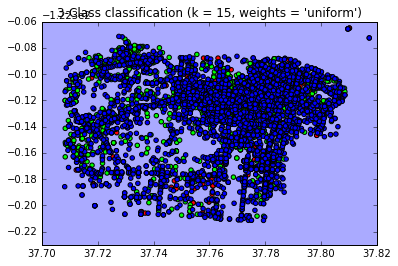

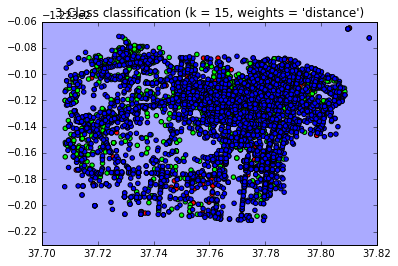

In [91]:
# FETCHED FROM THE LINK LISTED ABOVE AND MODIIFIED TO FIT OUR DATA
n_neighbors = 15 # number of neighbours to evaluate
h = .9           # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#AAAAFF', '#AAFFAA','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF', '#00FF00', '#FF0000'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
    plt.xlim(37.7,37.82)
    plt.ylim(-122.53,-122.36)
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
plt.show()

----
## <span style="color:green">Exercise 1C - Linear Regression</span>

### Chosen crime: ``insert here``
### Chosen training data year:

### Scatter plot of number of crimes per/time of day 

### Pearson R value:

### Fit this model to the data (and report $\alpha, \beta$).


----
## <span style="color:green">Exercise 1D - Multiple Regression</span>

* Firstly, instead of using total crime vs. the crime we're considering, remember to use differences between average total crime and observed crime.
* Secondly, remember to rescale your input variables.
### Explain in your own words the reasoning between the two bullets above.


### Finally, create and fit the data set using multiple regression. Report $\alpha, \beta_1, \beta_2$

----
## <span style="color:green">Exercise 1E - Simple evaluation of regression model</span>
### Comparison of the accuary of the simple linear regression with the multiple regression - what is gainedby increasing the model complexity?

In [ ]:
# Extracting week A and B


### Performance of Simple and Multiple Regression for weeks A and B

### Comments on results